In [20]:
import numpy as np               
import pandas as pd               
import seaborn as sns            
import matplotlib.pyplot as plt   
import scipy.stats               
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\uciml\iris\versions\2


In [22]:
iris = pd.read_csv(path + "/iris.csv")

print(iris.head())
print(iris.info())
print(iris.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
(150, 6)


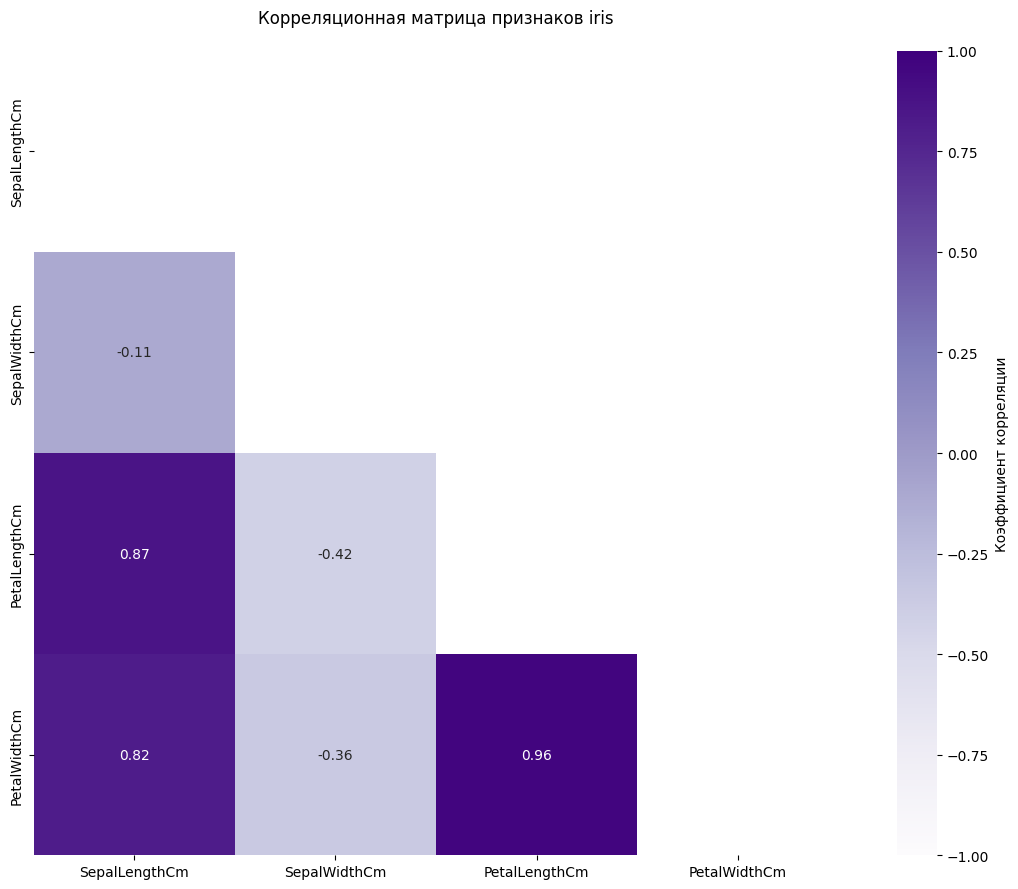

In [23]:
plt.figure(figsize=(12, 9))
sns.heatmap(matcorr, 
            mask=mask,
            cmap="Purples",
            vmin=-1,
            vmax=1,
            center=0,
            square=True,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Коэффициент корреляции'})  # Подпись шкалы
plt.title('Корреляционная матрица признаков iris', pad=20)  # Заголовок
plt.tight_layout()  # Оптимальное расположение элементов

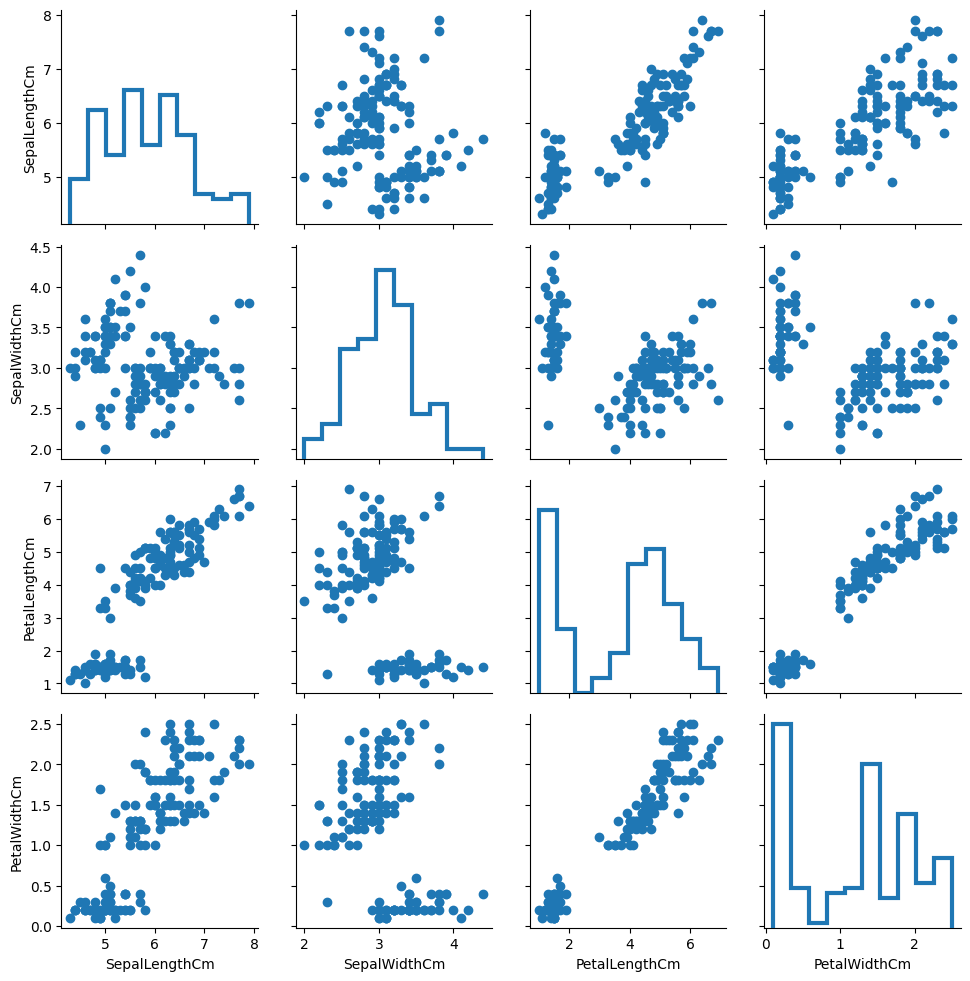

In [24]:
g = sns.PairGrid(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])
g.map_diag(plt.hist, histtype="step", linewidth=3)
g.map_offdiag(plt.scatter)

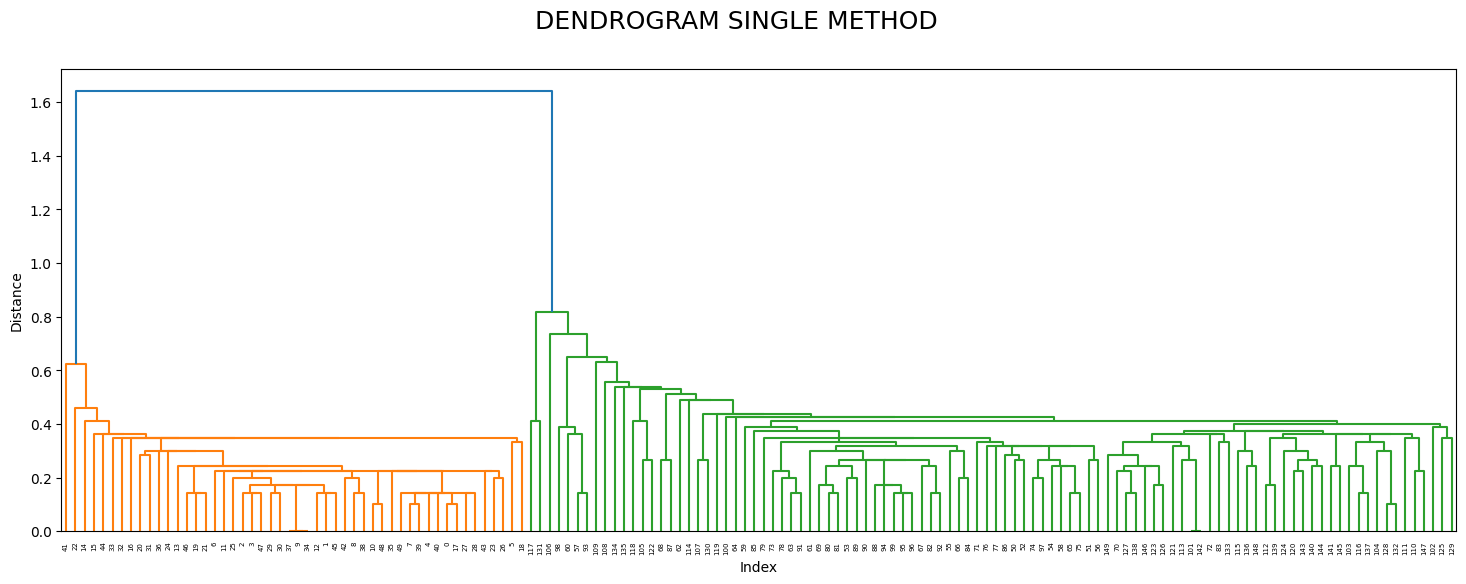

In [25]:
dist_sin = linkage(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [26]:
from scipy.cluster.hierarchy import fcluster
iris_SM=iris.copy()

iris_SM['2_clust']=fcluster(dist_sin,2, criterion='maxclust')
iris_SM['3_clust']=fcluster(dist_sin,3, criterion='maxclust')
iris_SM.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,2_clust,3_clust
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1


<Axes: title={'center': 'Species'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

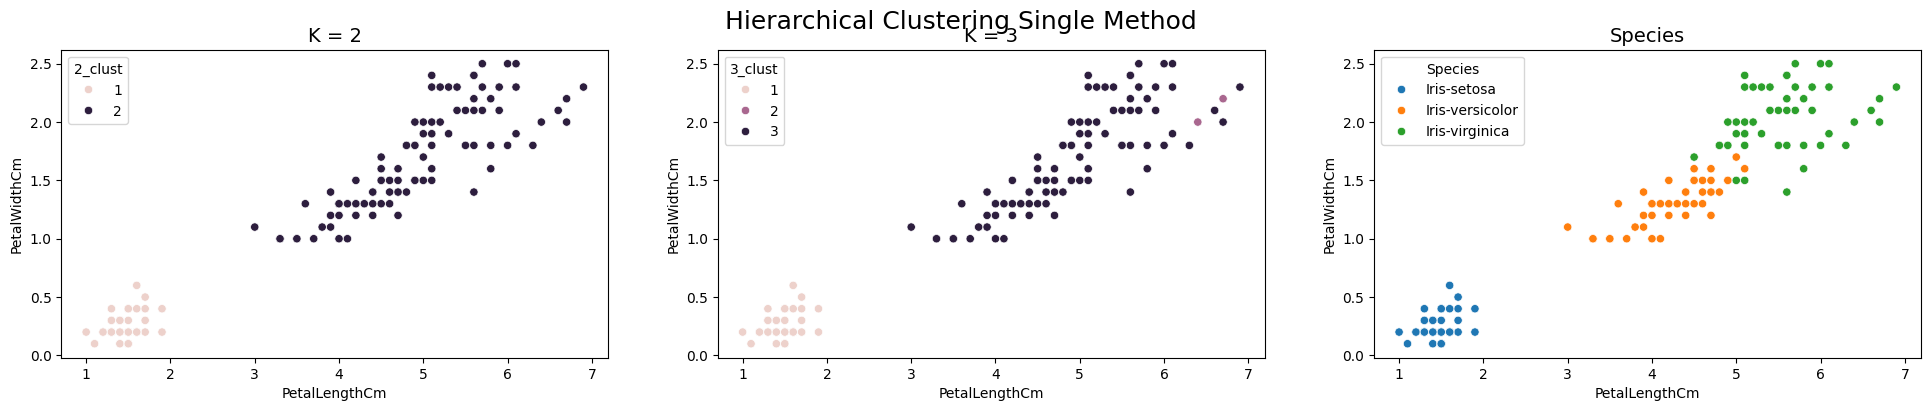

In [27]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="2_clust")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="3_clust")

plt.subplot(1,3,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="Species")


c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: title={'center': 'K = 3'}, xlabel='Species', ylabel='3_clust'>

c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


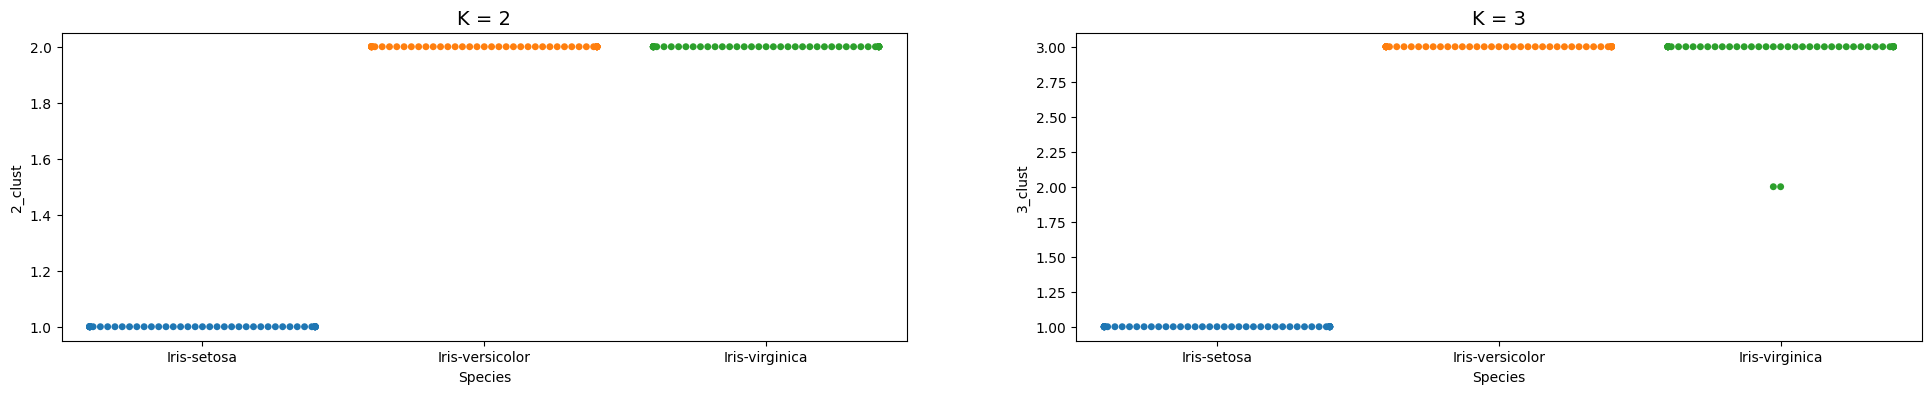

In [28]:
plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="Species",y="2_clust", data=iris_SM, hue="Species")

plt.subplot(1,2,2)
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="Species",y="3_clust", data=iris_SM, hue="Species")


<Axes: ylabel='2_clust'>

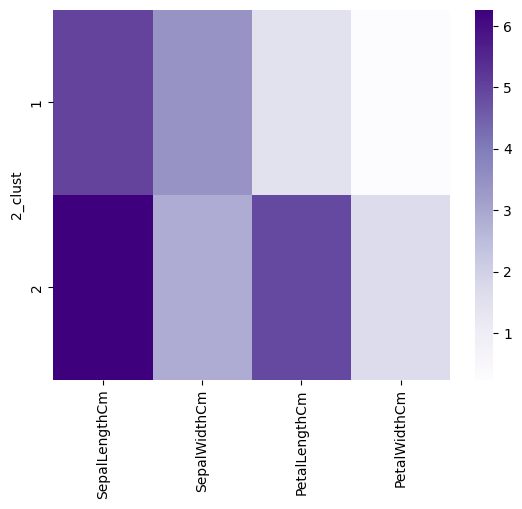

In [29]:
sns.heatmap(iris_SM.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","2_clust"]].groupby(['2_clust']).mean(), cmap="Purples")

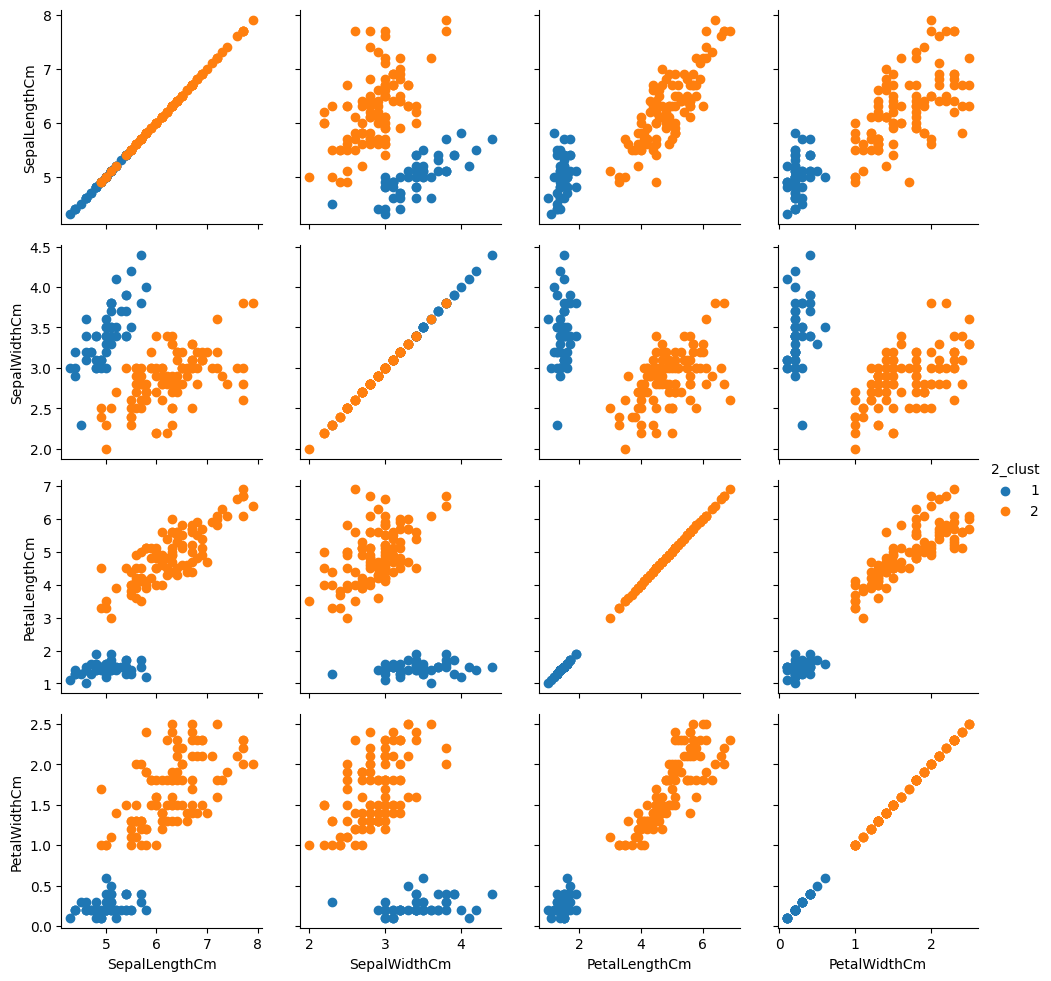

In [30]:
g = sns.PairGrid(iris_SM, vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], hue='2_clust')
g.map(plt.scatter)
g.add_legend()

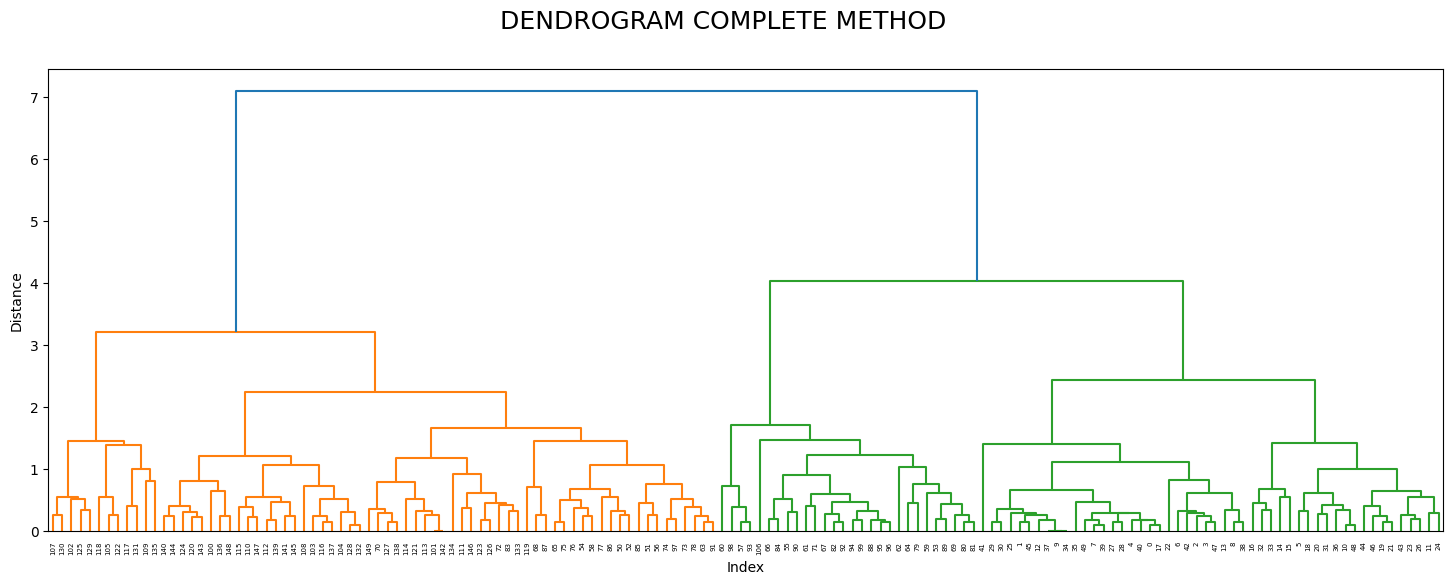

In [31]:
dist_comp = linkage(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="complete")

plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18) 
plt.show()

In [32]:
iris_CM=iris.copy()
iris_CM['2_clust']=fcluster(dist_comp,2, criterion='maxclust')
iris_CM['3_clust']=fcluster(dist_comp,3, criterion='maxclust')
iris_CM.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,2_clust,3_clust
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2,3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2,3
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2,3
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2,3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2,3


<Axes: title={'center': 'Species'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

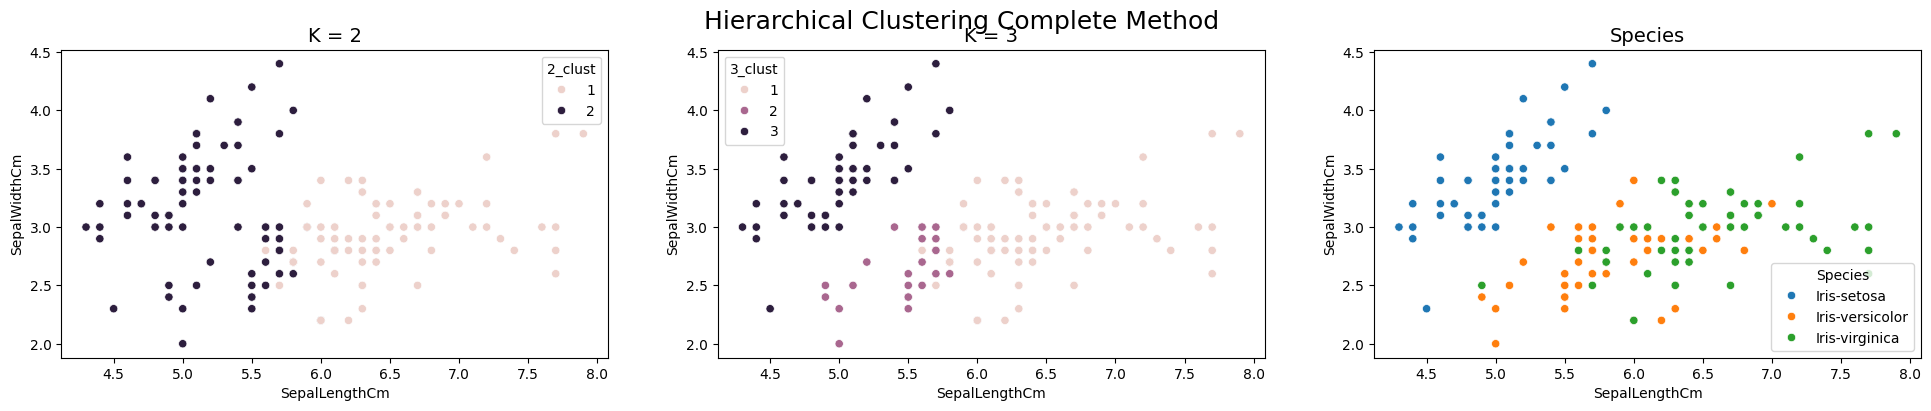

In [33]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Complete Method",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_CM, hue="2_clust")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_CM, hue="3_clust")

plt.subplot(1,3,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_CM, hue="Species")

c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of 

<Axes: title={'center': 'K = 3'}, xlabel='Species', ylabel='3_clust'>

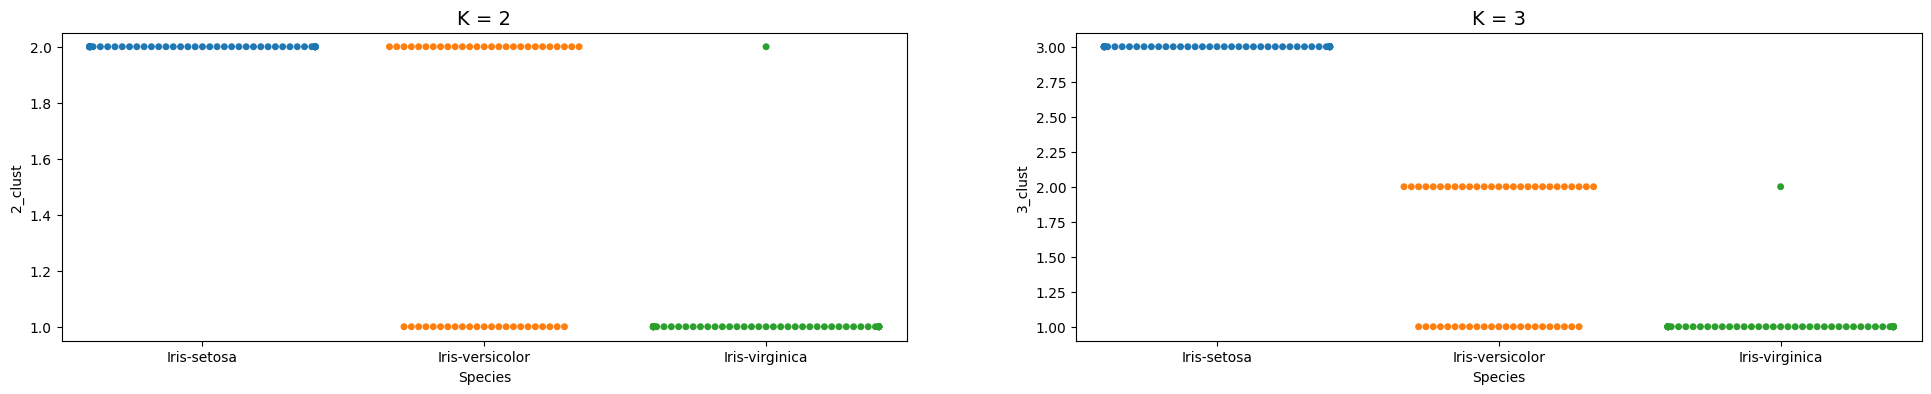

In [34]:
plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="Species",y="2_clust", data=iris_CM, hue="Species")

plt.subplot(1,2,2)
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="Species",y="3_clust", data=iris_CM, hue="Species")


In [35]:
print(pd.crosstab(iris_CM["Species"],iris_CM["3_clust"]))

3_clust           1   2   3
Species                    
Iris-setosa       0   0  50
Iris-versicolor  23  27   0
Iris-virginica   49   1   0


<Axes: ylabel='3_clust'>

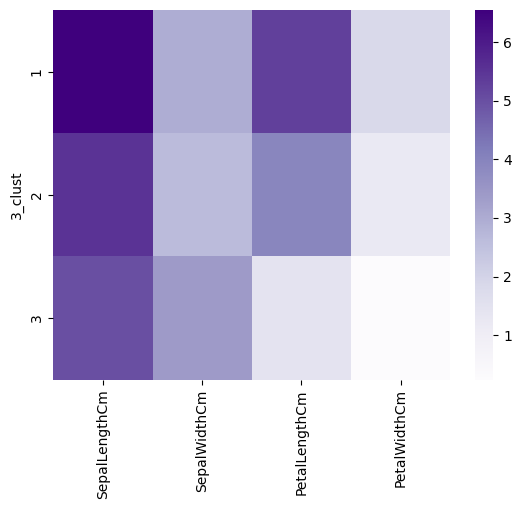

In [36]:
sns.heatmap(iris_CM.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","3_clust"]].groupby(['3_clust']).mean(), cmap="Purples")

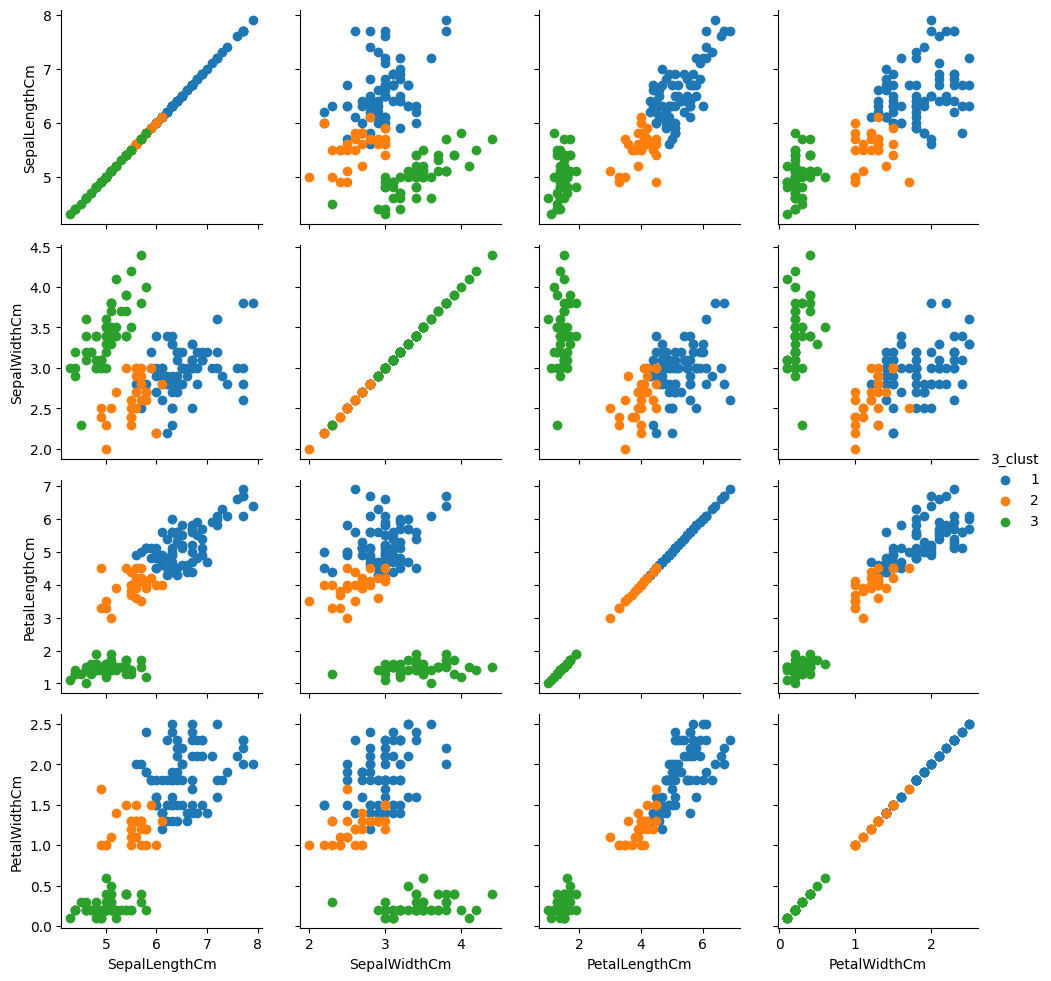

In [37]:
g = sns.PairGrid(iris_CM, vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], hue='3_clust')
g.map(plt.scatter)
g.add_legend()

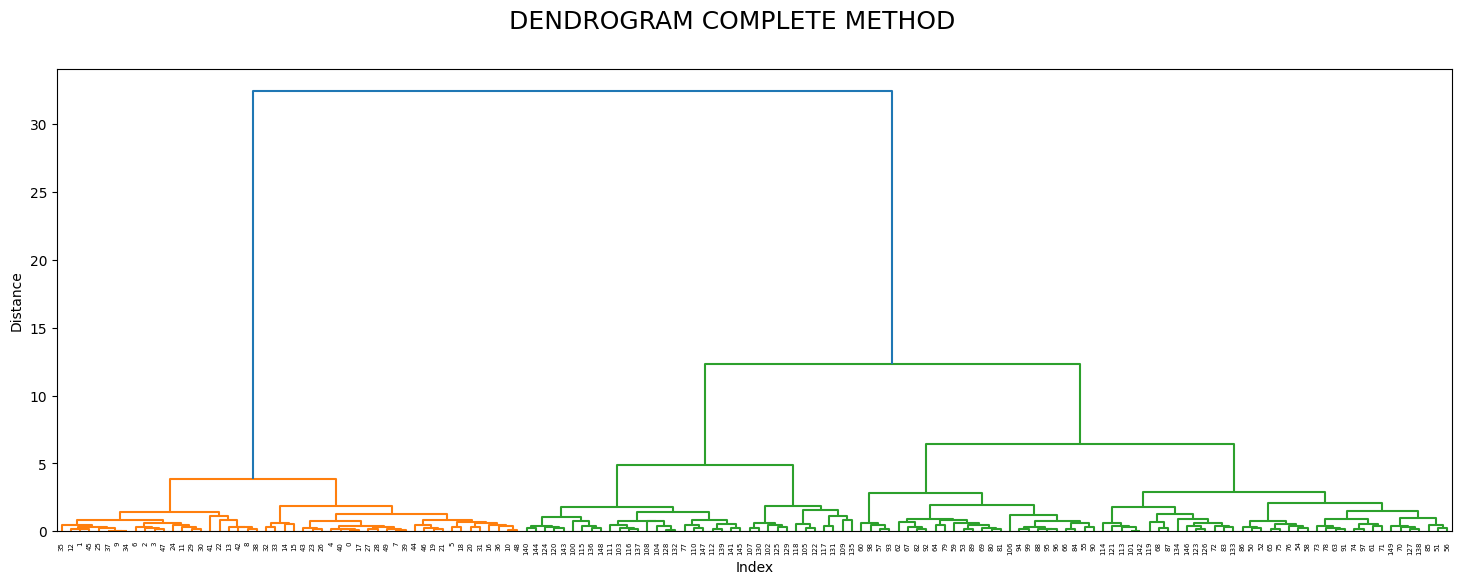

In [38]:
dist_comp = linkage(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="ward")

plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18) 
plt.show()

In [39]:
iris_WM=iris.copy()
iris_WM['2_clust']=fcluster(dist_comp,2, criterion='maxclust')
iris_WM['3_clust']=fcluster(dist_comp,3, criterion='maxclust')
iris_WM['4_clust']=fcluster(dist_comp,4, criterion='maxclust')
iris_WM.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,2_clust,3_clust,4_clust
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1,1


<Axes: title={'center': 'Species'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

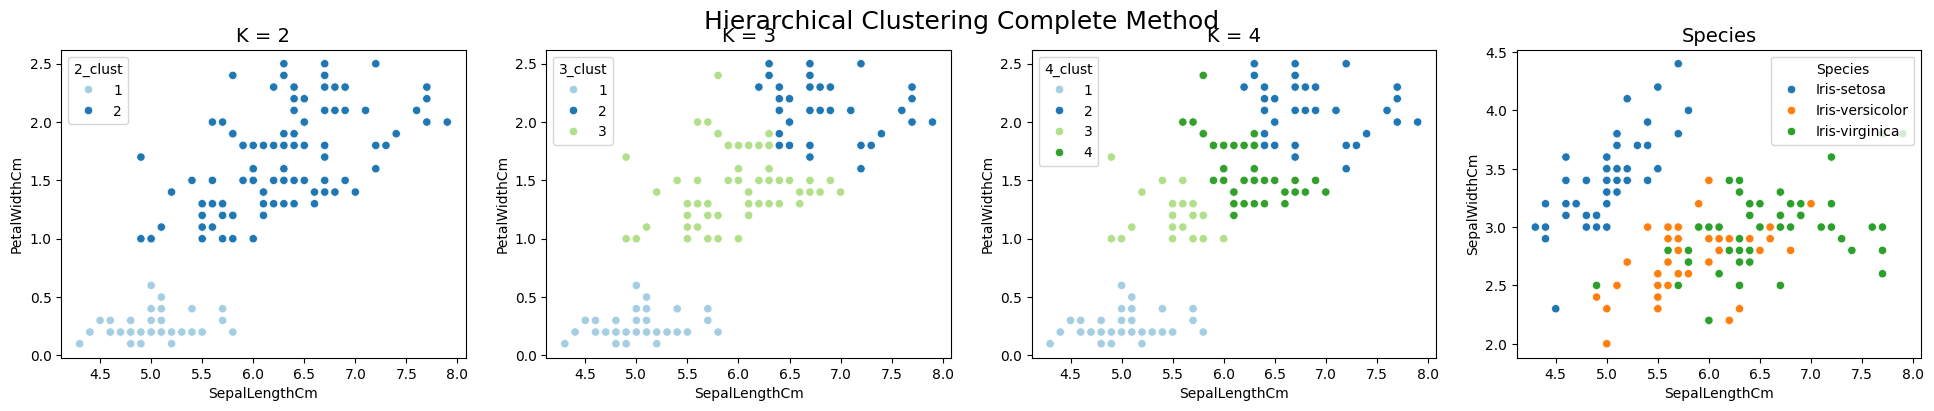

In [40]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Complete Method",fontsize=18)

plt.subplot(1,4,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="PetalWidthCm", data=iris_WM, hue="2_clust",palette="Paired")

plt.subplot(1,4,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="PetalWidthCm", data=iris_WM, hue="3_clust",palette="Paired")

plt.subplot(1,4,3)
plt.title("K = 4",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="PetalWidthCm", data=iris_WM, hue="4_clust",palette="Paired")

plt.subplot(1,4,4)
plt.title("Species",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_WM, hue="Species")

c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.0% of 

<Axes: title={'center': 'K = 4'}, xlabel='Species', ylabel='4_clust'>

c:\Program Files\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


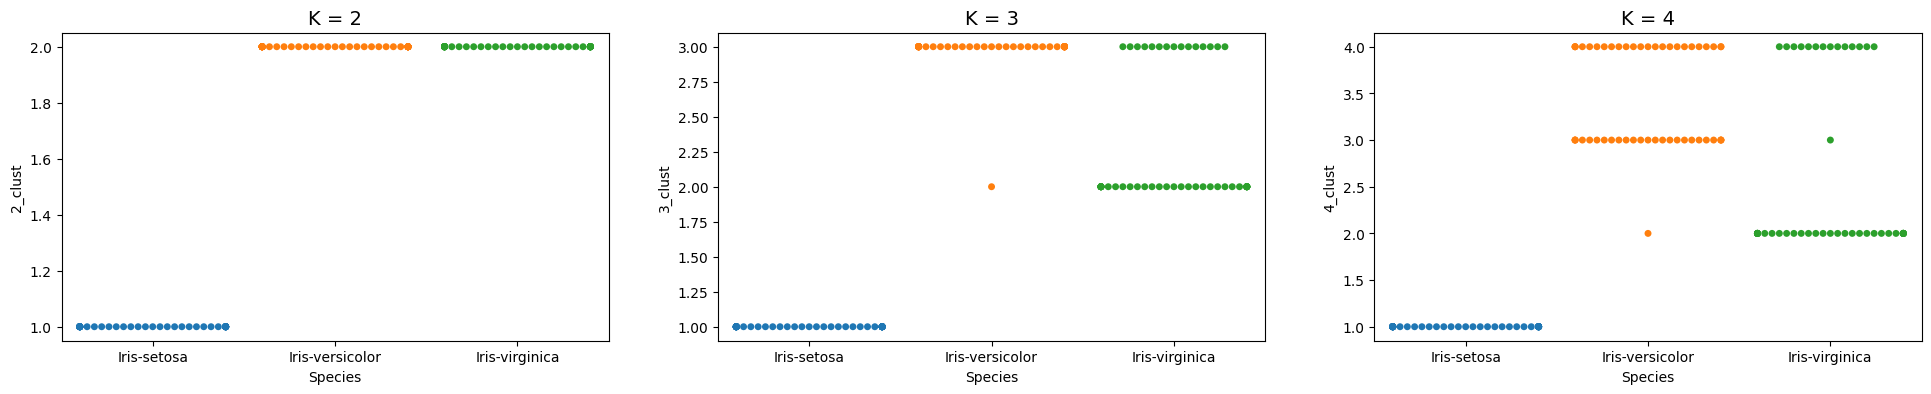

In [41]:
plt.figure(figsize=(24,4))
plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="Species",y="2_clust", data=iris_WM, hue="Species")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="Species",y="3_clust", data=iris_WM, hue="Species")

plt.subplot(1,3,3)
plt.title("K = 4",fontsize=14)
sns.swarmplot(x="Species",y="4_clust", data=iris_WM, hue="Species")



In [42]:
print(pd.crosstab(iris_CM["Species"],iris_WM["3_clust"]))
print('_____________________________________________')
print(pd.crosstab(iris_CM["Species"],iris_WM["4_clust"]))

3_clust           1   2   3
Species                    
Iris-setosa      50   0   0
Iris-versicolor   0   1  49
Iris-virginica    0  35  15
_____________________________________________
4_clust           1   2   3   4
Species                        
Iris-setosa      50   0   0   0
Iris-versicolor   0   1  25  24
Iris-virginica    0  35   1  14


<Axes: title={'center': 'K = 4'}, ylabel='4_clust'>

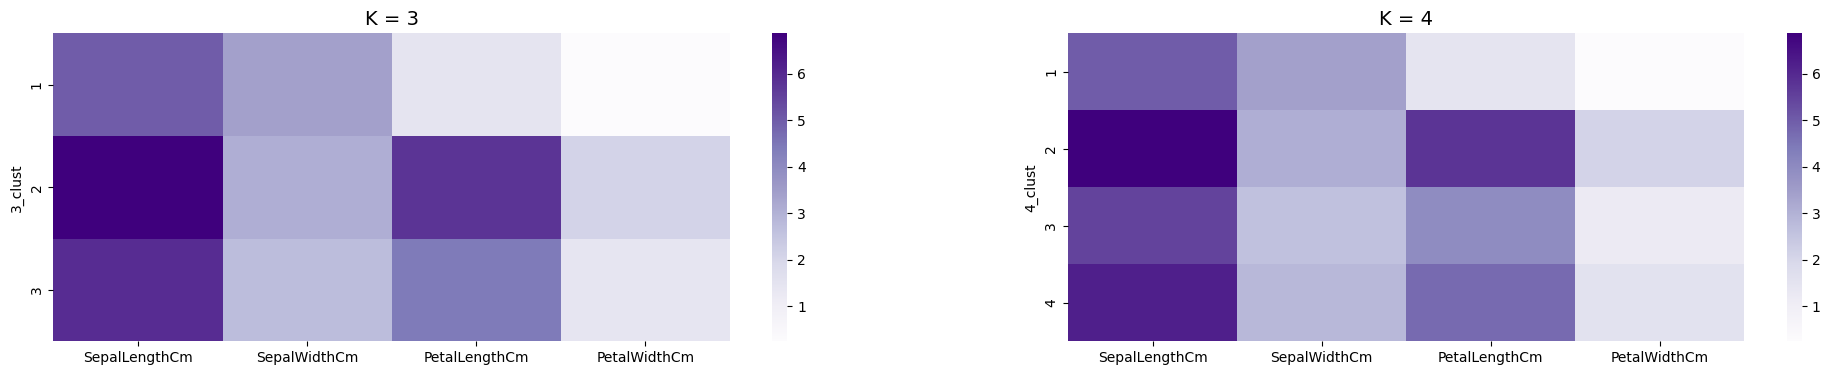

In [43]:
plt.figure(figsize=(24,4))

plt.subplot(1,2,1)
plt.title("K = 3",fontsize=14)
sns.heatmap(iris_WM.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","3_clust"]].groupby(['3_clust']).mean(), cmap="Purples")

plt.subplot(1,2,2)
plt.title("K = 4",fontsize=14)
sns.heatmap(iris_WM.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","4_clust"]].groupby(['4_clust']).mean(), cmap="Purples")

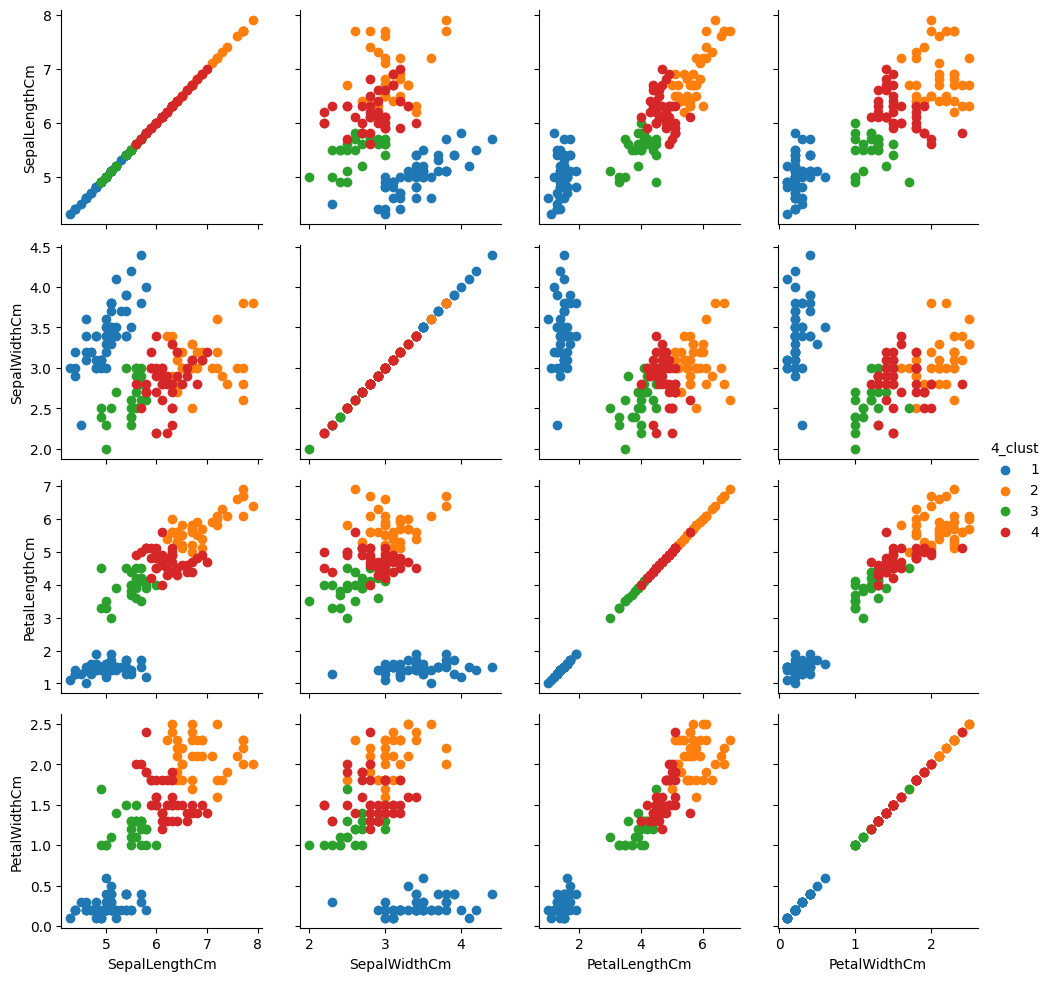

In [44]:
g = sns.PairGrid(iris_WM, vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], hue='4_clust')
g.map(plt.scatter)
g.add_legend()